# Обработка пропусков в данных, кодирование категориальных признаков, масштабирование данных.

Мы научимся обрабатывать пропуски в данных для количественных (числовых) и категориальных признаков и масштабировать данные. Также мы научимся преобразовывать категориальные признаки в числовые.

### В чем состоит проблема?

- Если в данных есть пропуски, то большинство алгоритмов машинного обучения не будут с ними работать. Даже корреляционная матрица не будет строиться корректно.
- Большинство алгоритмов машинного обучения требуют явного перекодирования категориальных признаков в числовые. Даже если алгоритм не требует этого явно, такое перекодирование возможно стоит попробовать, чтобы повысить качество модели.
- Большинство алгоритмов показывает лучшее качество на масштабированных признаках, в особенности алгоритмы, использующие методы градиентного спуска.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

## Загрузка и первичный анализ данных

Используем датасет по супергеройским фильмам [Most popular superhero TV shows](https://www.kaggle.com/anoopkumarraut/most-popular-superhero-tv-shows).

In [2]:
# Будем использовать только обучающую выборку
data = pd.read_csv('data/superheroes.csv', sep=",", thousands=',')

In [3]:
# размер набора данных
data.shape

(750, 8)

In [4]:
# преобразование "object" в действительные типы колонок
data[["runtime", "imdb_votes"]] = data[["runtime", "imdb_votes"]].apply(pd.to_numeric)

# типы колонок
data.dtypes

show_title             object
imdb_rating            object
release_year           object
runtime               float64
genre                  object
parental_guideline     object
imdb_votes            float64
synopsis               object
dtype: object

In [5]:
# проверим есть ли пропущенные значения
data.isnull().sum()

show_title              0
imdb_rating            15
release_year            0
runtime               106
genre                   0
parental_guideline    169
imdb_votes             36
synopsis                0
dtype: int64

In [6]:
# Первые 5 строк датасета
data.head()

,show_title,imdb_rating,release_year,runtime,genre,parental_guideline,imdb_votes,synopsis
0,Peacemaker,8.5,2022-,40.0,"Action, Adventure, Comedy",TV-MA,60116.0,Picking up where The Suicide Squad (2021) left...
1,The Legend of Vox Machina,8.6,2022-,30.0,"Animation, Action, Adventure",TV-MA,13128.0,In a desperate attempt to pay off a mounting b...
2,Daredevil,8.6,2015-2018,54.0,"Action, Crime, Drama",TV-MA,410433.0,"A blind lawyer by day, vigilante by night. Mat..."
3,The Boys,8.7,2019-,60.0,"Action, Crime, Drama",TV-MA,347831.0,A group of vigilantes set out to take down cor...
4,Raising Dion,7.2,2019-,50.0,"Drama, Sci-Fi",TV-G,13375.0,A widowed single mom discovers that her son ha...


In [7]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 750


# Обработка пропусков в данных

## Простые стратегии - удаление или заполнение нулями

Удаление колонок, содержащих пустые значения
`res = data.dropna(axis=1, how='any')`

Удаление строк, содержащих пустые значения
`res = data.dropna(axis=0, how='any')`

[Документация](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html)

**Удаление может производиться для группы строк или колонок.**

In [8]:
# Удаление колонок, содержащих пустые значения
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((750, 8), (750, 4))

In [9]:
# Удаление строк, содержащих пустые значения
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((750, 8), (530, 8))

In [10]:
data[10:15]

,show_title,imdb_rating,release_year,runtime,genre,parental_guideline,imdb_votes,synopsis
10,The Umbrella Academy,8,2019-,60.0,"Action, Adventure, Comedy",TV-14,196483.0,"A family of former child heroes, now grown apa..."
11,Loki,8.3,2021-,NaN,"Action, Adventure, Fantasy",TV-14,268311.0,The mercurial villain Loki resumes his role as...
12,Agents of S.H.I.E.L.D.,7.5,2013-2020,45.0,"Action, Adventure, Drama",TV-PG,211951.0,The missions of the Strategic Homeland Interve...
13,What If...?,7.5,2021-,32.0,"Animation, Action, Adventure",TV-14,89330.0,Exploring pivotal moments from the Marvel Cine...
14,Gotham,7.8,2014-2019,42.0,"Action, Crime, Drama",TV-14,223106.0,The story behind Detective James Gordon's rise...


In [11]:
# Заполнение всех пропущенных значений нулями
# В данном случае это некорректно, так как нулями заполняются в том числе категориальные колонки
data_new_3 = data.fillna(0)
data_new_3[10:15]

,show_title,imdb_rating,release_year,runtime,genre,parental_guideline,imdb_votes,synopsis
10,The Umbrella Academy,8,2019-,60.0,"Action, Adventure, Comedy",TV-14,196483.0,"A family of former child heroes, now grown apa..."
11,Loki,8.3,2021-,0.0,"Action, Adventure, Fantasy",TV-14,268311.0,The mercurial villain Loki resumes his role as...
12,Agents of S.H.I.E.L.D.,7.5,2013-2020,45.0,"Action, Adventure, Drama",TV-PG,211951.0,The missions of the Strategic Homeland Interve...
13,What If...?,7.5,2021-,32.0,"Animation, Action, Adventure",TV-14,89330.0,Exploring pivotal moments from the Marvel Cine...
14,Gotham,7.8,2014-2019,42.0,"Action, Crime, Drama",TV-14,223106.0,The story behind Detective James Gordon's rise...


## "Внедрение значений" - импьютация (imputation)

### Обработка пропусков в числовых данных

In [12]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка runtime. Тип данных float64. Количество пустых значений 106, 14.13%.
Колонка imdb_votes. Тип данных float64. Количество пустых значений 36, 4.8%.


In [13]:
# Фильтр по колонкам с пропущенными значениями
data_num = data[num_cols]
data_num

,runtime,imdb_votes
0,40.0,60116.0
1,30.0,13128.0
2,54.0,410433.0
3,60.0,347831.0
4,50.0,13375.0
...,...,...
745,30.0,820.0
746,25.0,647.0
747,NaN,62.0
748,27.0,77.0


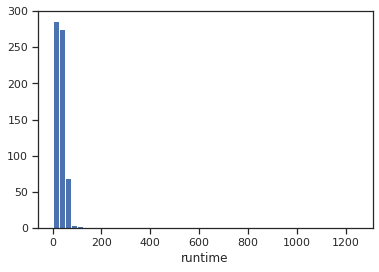

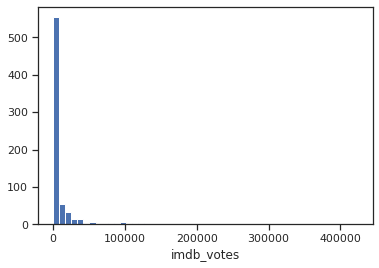

In [52]:
# Гистограмма по признакам
for col in data_num:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

Будем использовать встроенные средства импьютации библиотеки scikit-learn - https://scikit-learn.org/stable/modules/impute.html

In [15]:
data_num_runtime = data_num[['runtime']]
data_num_runtime[10:15]

,runtime
10,60.0
11,NaN
12,45.0
13,32.0
14,42.0


In [16]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [17]:
# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_runtime)
mask_missing_values_only

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

С помощью класса [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer) можно проводить импьютацию различными [показателями центра распределения](https://ru.wikipedia.org/wiki/%D0%9F%D0%BE%D0%BA%D0%B0%D0%B7%D0%B0%D1%82%D0%B5%D0%BB%D0%B8_%D1%86%D0%B5%D0%BD%D1%82%D1%80%D0%B0_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D1%8F)

In [18]:
strategies=['mean', 'median', 'most_frequent']

In [19]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_runtime)
    return data_num_imp[mask_missing_values_only]

In [20]:
strategies[0], test_num_impute(strategies[0])

('mean',
 array([34.73291925, 34.73291925, 34.73291925, 34.73291925, 34.73291925,
        34.73291925, 34.73291925, 34.73291925, 34.73291925, 34.73291925,
        34.73291925, 34.73291925, 34.73291925, 34.73291925, 34.73291925,
        34.73291925, 34.73291925, 34.73291925, 34.73291925, 34.73291925,
        34.73291925, 34.73291925, 34.73291925, 34.73291925, 34.73291925,
        34.73291925, 34.73291925, 34.73291925, 34.73291925, 34.73291925,
        34.73291925, 34.73291925, 34.73291925, 34.73291925, 34.73291925,
        34.73291925, 34.73291925, 34.73291925, 34.73291925, 34.73291925,
        34.73291925, 34.73291925, 34.73291925, 34.73291925, 34.73291925,
        34.73291925, 34.73291925, 34.73291925, 34.73291925, 34.73291925,
        34.73291925, 34.73291925, 34.73291925, 34.73291925, 34.73291925,
        34.73291925, 34.73291925, 34.73291925, 34.73291925, 34.73291925,
        34.73291925, 34.73291925, 34.73291925, 34.73291925, 34.73291925,
        34.73291925, 34.73291925, 34.73291

In [21]:
strategies[1], test_num_impute(strategies[1])

('median',
 array([30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30.,
        30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30.,
        30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30.,
        30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30.,
        30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30.,
        30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30.,
        30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30.,
        30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30.,
        30., 30.]))

In [22]:
strategies[2], test_num_impute(strategies[2])

('most_frequent',
 array([30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30.,
        30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30.,
        30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30.,
        30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30.,
        30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30.,
        30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30.,
        30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30.,
        30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30.,
        30., 30.]))

In [23]:
# Более сложная функция, которая позволяет задавать колонку и вид импьютации
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [24]:
data[['imdb_votes']].describe()

,imdb_votes
count,714.000000
mean,13576.459384
std,41723.725840
min,14.000000
25%,546.250000
50%,1758.500000
75%,6901.000000
max,423527.000000


In [25]:
test_num_impute_col(data, 'imdb_votes', strategies[0])

('imdb_votes', 'mean', 36, 13576.459383753501, 13576.459383753501)

In [26]:
test_num_impute_col(data, 'imdb_votes', strategies[1])

('imdb_votes', 'median', 36, 1758.5, 1758.5)

In [27]:
test_num_impute_col(data, 'imdb_votes', strategies[2])

('imdb_votes', 'most_frequent', 36, 133.0, 133.0)

### Обработка пропусков в категориальных данных

In [28]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка imdb_rating. Тип данных object. Количество пустых значений 15, 2.0%.
Колонка parental_guideline. Тип данных object. Количество пустых значений 169, 22.53%.


**Какие из этих колонок Вы бы выбрали или не выбрали для построения модели?**

Класс SimpleImputer можно использовать для категориальных признаков со стратегиями "most_frequent" или "constant".

In [29]:
cat_temp_data = data[['parental_guideline']]
cat_temp_data[15:20]

,parental_guideline
15,TV-14
16,TV-MA
17,TV-MA
18,TV-14
19,NaN


In [30]:
cat_temp_data['parental_guideline'].unique()

array(['TV-MA', 'TV-G', 'TV-PG', 'TV-14', nan, 'TV-Y7-FV', 'TV-Y7',
       'TV-Y', 'Not Rated', 'R', 'PG-13'], dtype=object)

In [31]:
cat_temp_data[cat_temp_data['parental_guideline'].isnull()].shape

(169, 1)

In [32]:
# Импьютация наиболее частыми значениями
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['TV-MA'],
       ['TV-MA'],
       ['TV-MA'],
       ['TV-MA'],
       ['TV-G'],
       ['TV-MA'],
       ['TV-PG'],
       ['TV-MA'],
       ['TV-PG'],
       ['TV-14'],
       ['TV-14'],
       ['TV-14'],
       ['TV-PG'],
       ['TV-14'],
       ['TV-14'],
       ['TV-14'],
       ['TV-MA'],
       ['TV-MA'],
       ['TV-14'],
       ['TV-Y7'],
       ['TV-MA'],
       ['TV-Y7-FV'],
       ['TV-Y7-FV'],
       ['TV-Y7'],
       ['TV-14'],
       ['TV-PG'],
       ['TV-PG'],
       ['TV-14'],
       ['TV-Y7'],
       ['TV-MA'],
       ['TV-PG'],
       ['TV-MA'],
       ['TV-MA'],
       ['TV-14'],
       ['TV-PG'],
       ['TV-14'],
       ['TV-Y7'],
       ['TV-14'],
       ['TV-PG'],
       ['TV-PG'],
       ['TV-MA'],
       ['TV-14'],
       ['TV-PG'],
       ['TV-MA'],
       ['TV-MA'],
       ['TV-Y7'],
       ['TV-Y7'],
       ['TV-MA'],
       ['TV-PG'],
       ['TV-PG'],
       ['TV-PG'],
       ['TV-PG'],
       ['TV-14'],
       ['TV-MA'],
       ['TV-MA'],
     

In [33]:
# Пустые значения отсутствуют
np.unique(data_imp2)

array(['Not Rated', 'PG-13', 'R', 'TV-14', 'TV-G', 'TV-MA', 'TV-PG',
       'TV-Y', 'TV-Y7', 'TV-Y7-FV'], dtype=object)

In [34]:
# Импьютация константой
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='Not Rated')
data_imp3 = imp3.fit_transform(cat_temp_data)
data_imp3

array([['TV-MA'],
       ['TV-MA'],
       ['TV-MA'],
       ['TV-MA'],
       ['TV-G'],
       ['TV-MA'],
       ['TV-PG'],
       ['TV-MA'],
       ['TV-PG'],
       ['TV-14'],
       ['TV-14'],
       ['TV-14'],
       ['TV-PG'],
       ['TV-14'],
       ['TV-14'],
       ['TV-14'],
       ['TV-MA'],
       ['TV-MA'],
       ['TV-14'],
       ['Not Rated'],
       ['TV-MA'],
       ['TV-Y7-FV'],
       ['TV-Y7-FV'],
       ['TV-Y7'],
       ['TV-14'],
       ['TV-PG'],
       ['TV-PG'],
       ['TV-14'],
       ['Not Rated'],
       ['TV-MA'],
       ['TV-PG'],
       ['TV-MA'],
       ['TV-MA'],
       ['TV-14'],
       ['TV-PG'],
       ['TV-14'],
       ['Not Rated'],
       ['TV-14'],
       ['TV-PG'],
       ['TV-PG'],
       ['TV-MA'],
       ['TV-14'],
       ['TV-PG'],
       ['TV-MA'],
       ['TV-MA'],
       ['TV-Y7'],
       ['Not Rated'],
       ['TV-MA'],
       ['TV-PG'],
       ['TV-PG'],
       ['TV-PG'],
       ['TV-PG'],
       ['TV-14'],
       ['TV-MA'],
       

In [35]:
np.unique(data_imp3)

array(['Not Rated', 'PG-13', 'R', 'TV-14', 'TV-G', 'TV-MA', 'TV-PG',
       'TV-Y', 'TV-Y7', 'TV-Y7-FV'], dtype=object)

In [36]:
data_imp3[data_imp3=='Not Rated'].size

173

# Преобразование категориальных признаков в числовые

In [37]:
cat_enc = pd.DataFrame({'parental_guideline':data_imp2.T[0]})
cat_enc

,parental_guideline
0,TV-MA
1,TV-MA
2,TV-MA
3,TV-MA
4,TV-G
...,...
745,TV-Y7
746,TV-Y7
747,TV-Y7
748,TV-PG


## Кодирование категорий целочисленными значениями - [label encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)

In [38]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [39]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['parental_guideline'])

In [128]:
cat_enc['parental_guideline'].unique()

array(['TV-MA', 'TV-G', 'TV-PG', 'TV-14', 'TV-Y7', 'TV-Y7-FV', 'TV-Y',
       'Not Rated', 'R', 'PG-13'], dtype=object)

In [129]:
np.unique(cat_enc_le)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [130]:
le.inverse_transform([0, 1, 2, 3])

array(['Not Rated', 'PG-13', 'R', 'TV-14'], dtype=object)

## Кодирование категорий наборами бинарных значений - [one-hot encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)

In [131]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(cat_enc[['parental_guideline']])

In [132]:
cat_enc.shape

(750, 1)

In [133]:
cat_enc_ohe.shape

(750, 10)

In [134]:
cat_enc_ohe

<750x10 sparse matrix of type '<class 'numpy.float64'>'
	with 750 stored elements in Compressed Sparse Row format>

In [135]:
cat_enc_ohe.todense()[0:10]

matrix([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]])

In [136]:
cat_enc.head(10)

,parental_guideline
0,TV-MA
1,TV-MA
2,TV-MA
3,TV-MA
4,TV-G
5,TV-MA
6,TV-PG
7,TV-MA
8,TV-PG
9,TV-14


## [Pandas get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) - быстрый вариант one-hot кодирования

In [137]:
pd.get_dummies(cat_enc).head()

,parental_guideline_Not Rated,parental_guideline_PG-13,parental_guideline_R,parental_guideline_TV-14,parental_guideline_TV-G,parental_guideline_TV-MA,parental_guideline_TV-PG,parental_guideline_TV-Y,parental_guideline_TV-Y7,parental_guideline_TV-Y7-FV
0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0


In [138]:
pd.get_dummies(cat_temp_data, dummy_na=True).head()

,parental_guideline_Not Rated,parental_guideline_PG-13,parental_guideline_R,parental_guideline_TV-14,parental_guideline_TV-G,parental_guideline_TV-MA,parental_guideline_TV-PG,parental_guideline_TV-Y,parental_guideline_TV-Y7,parental_guideline_TV-Y7-FV,parental_guideline_nan
0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0


# Масштабирование данных

Термины "масштабирование" и "нормализация" часто используются как синонимы, но это неверно. Масштабирование предполагает изменение диапазона измерения величины, а нормализация - изменение распределения этой величины. В этом разделе рассматривается только масштабирование.

Если признаки лежат в различных диапазонах, то необходимо их нормализовать. Как правило, применяют два подхода:
- MinMax масштабирование:
$$ x_{новый} = \frac{x_{старый} - min(X)}{max(X)-min(X)} $$

В этом случае значения лежат в диапазоне от 0 до 1.
- Масштабирование данных на основе [Z-оценки](https://ru.wikipedia.org/wiki/Z-%D0%BE%D1%86%D0%B5%D0%BD%D0%BA%D0%B0):
$$ x_{новый} = \frac{x_{старый} - AVG(X) }{\sigma(X)} $$

В этом случае большинство значений попадает в диапазон от -3 до 3.

где $X$ - матрица объект-признак, $AVG(X)$ - среднее значение, $\sigma$ - среднеквадратичное отклонение.

In [139]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

## [MinMax масштабирование](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

In [140]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['runtime']])

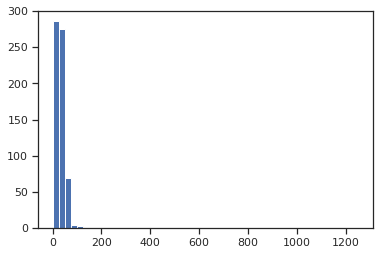

In [141]:
plt.hist(data['runtime'], 50)
plt.show()

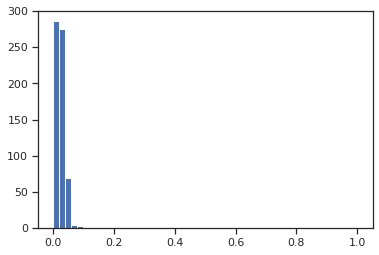

In [142]:
plt.hist(sc1_data, 50)
plt.show()

## Масштабирование данных на основе [Z-оценки](https://ru.wikipedia.org/wiki/Z-%D0%BE%D1%86%D0%B5%D0%BD%D0%BA%D0%B0) - [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)

In [144]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['runtime']])

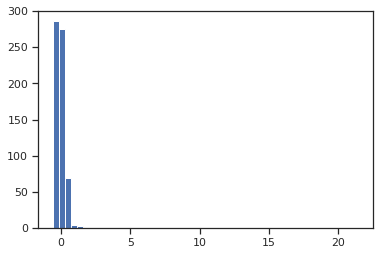

In [145]:
plt.hist(sc2_data, 50)
plt.show()

# Дополнительные источники
- [Руководство scikit-learn по предобработке данных](https://scikit-learn.org/stable/modules/preprocessing.html)
- [Kaggle Data Cleaning Challenge: Handling missing values (упражнения с пояснениями по обработке пропущенных значений и масштабированию признаков)](https://www.kaggle.com/rtatman/data-cleaning-challenge-handling-missing-values)
- [Краткое руководство по категориальным признакам](https://towardsdatascience.com/encoding-categorical-features-21a2651a065c)